In [1]:
import tensorflow as tf
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras import *
from keras.src.layers import Dense, LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import tensorflow as tf

model_path = '/Users/nathanbouquet/Desktop/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/SavedNetworks/ART_ResNet_save_at_20.keras'
model = tf.keras.models.load_model(model_path)
print('hello')
print(model.summary())  # Print model summary to verify loading


: 

In [2]:
# Data read in

image_size = (512, 512)
batch_size = 10

train_data, val_data = keras.utils.image_dataset_from_directory(
    "C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/Data/ART",
    labels="inferred",
    validation_split=0.2,
    subset="both",
    seed=1354,
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
)

# Splitting the validation data into validation and test data
VAL_DATASET_SIZE = len(val_data)
val_size = int(0.2 * VAL_DATASET_SIZE)
test_size = VAL_DATASET_SIZE - val_size

val_data = val_data.shuffle(VAL_DATASET_SIZE)
new_val_data = val_data.take(val_size)
test_data = val_data.skip(val_size)


print("Training Classes:")
class_names = train_data.class_names
print(class_names)
print(len(test_data))

Found 18618 files belonging to 2 classes.
Using 14895 files for training.
Using 3723 files for validation.
Training Classes:
['AI_GENERATED', 'NON_AI_GENERATED']
299


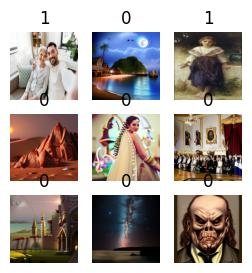

In [6]:
# Data Visualization

plt.figure(figsize=(3, 3))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [4]:
# Model

# Copied from keras:

# def make_model(input_shape, num_classes):
#     inputs = keras.Input(shape=input_shape)

#     # Entry block
#     x = layers.Rescaling(1.0 / 255)(inputs)
#     x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     previous_block_activation = x  # Set aside residual

#     for size in [256, 512, 728]:
#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(size, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.Activation("relu")(x)
#         x = layers.SeparableConv2D(size, 3, padding="same")(x)
#         x = layers.BatchNormalization()(x)

#         x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

#         # Project residual
#         residual = layers.Conv2D(size, 1, strides=2, padding="same")(
#             previous_block_activation
#         )
#         x = layers.add([x, residual])  # Add back residual
#         previous_block_activation = x  # Set aside next residual

#     x = layers.SeparableConv2D(1024, 3, padding="same")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)

#     x = layers.GlobalAveragePooling2D()(x)
#     if num_classes == 2:
#         units = 1
#     else:
#         units = num_classes

#     x = layers.Dropout(0.25)(x)
#     # We specify activation=None so as to return logits
#     outputs = layers.Dense(units, activation=None)(x)
#     return keras.Model(inputs, outputs)


# model = make_model(input_shape=image_size + (3,), num_classes=2)
# keras.utils.plot_model(model, show_shapes=True)

In [27]:
# # Copied from keras:

# epochs = 5

# callbacks = [
#     keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
# ]
# model.compile(
#     optimizer=keras.optimizers.Adam(3e-4),
#     loss=keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=[keras.metrics.BinaryAccuracy(name="acc")],
# )
# model.fit(
#     train_data,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_data=val_data,
# )

Epoch 1/5
160/160 [==============================] - 343s 2s/step - loss: 0.2478 - acc: 0.8918 - val_loss: 0.7498 - val_acc: 0.5049
Epoch 2/5
160/160 [==============================] - 332s 2s/step - loss: 0.1437 - acc: 0.9427 - val_loss: 1.3142 - val_acc: 0.5049
Epoch 3/5
160/160 [==============================] - 350s 2s/step - loss: 0.0940 - acc: 0.9626 - val_loss: 2.8873 - val_acc: 0.5049
Epoch 4/5
160/160 [==============================] - 328s 2s/step - loss: 0.0559 - acc: 0.9782 - val_loss: 4.9363 - val_acc: 0.5049
Epoch 5/5
160/160 [==============================] - 332s 2s/step - loss: 0.0374 - acc: 0.9855 - val_loss: 0.5193 - val_acc: 0.8755


In [3]:
def normalize_data(data, label):
    data = tf.cast(data, tf.float32) / 255.0
    return data, label

train_data = train_data.map(normalize_data)
val_data = val_data.map(normalize_data)
test_data = test_data.map(normalize_data)

In [4]:

# Creating the CNN

# Conv2D layers are the convolutional layers. They are used to detect patterns in the images.
# They detect edges, shapes, and textures in the images.

# Dense layers are the fully connected layers. 
# They are used to classify the patterns found by the convolutional layers.

# MaxPooling2D layers are used to reduce the spatial dimensions of the output volume.

# Idea: Convolution finds something useful, pooling pools it together to summarize
# The combination of convolution and pooling layers allows CNNs to combine local features and learn more global features of the image.
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(512, 512, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Dropout layer after MaxPooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Dropout layer after MaxPooling
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),  # Dropout layer after GlobalAveragePooling
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [5]:
epochs = 8

## WHEN RUNNING, make sure to change the name of the file. The clearer the name, the better. All changed parameters etc. 
## Even better if you take notes in a separate document. Trust, you will forget everything :)

callbacks = [
    keras.callbacks.ModelCheckpoint("ART_CNN_dropout2_save_at_{epoch}.keras"), # change the name of the file
]

history = model.fit(
    train_data,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_data,
)

Epoch 1/8



c:\Python311\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



1490/1490 [==============================] - 1823s 1s/step - loss: 0.5820 - accuracy: 0.7094 - val_loss: 0.5070 - val_accuracy: 0.7784
Epoch 2/8
1490/1490 [==============================] - 1579s 1s/step - loss: 0.4970 - accuracy: 0.7763 - val_loss: 0.4363 - val_accuracy: 0.8160
Epoch 3/8
1490/1490 [==============================] - 1549s 1s/step - loss: 0.4028 - accuracy: 0.8341 - val_loss: 0.3292 - val_accuracy: 0.8746
Epoch 4/8
1490/1490 [==============================] - 1568s 1s/step - loss: 0.3499 - accuracy: 0.8613 - val_loss: 0.3009 - val_accuracy: 0.8824
Epoch 5/8
1490/1490 [==============================] - 1585s 1s/step - loss: 0.3152 - accuracy: 0.8716 - val_loss: 0.3031 - val_accuracy: 0.8853
Epoch 6/8
1490/1490 [==============================] - 1571s 1s/step - loss: 0.2997 - accuracy: 0.8775 - val_loss: 0.3063 - val_accuracy: 0.8842
Epoch 7/8
1490/1490 [==============================] - 1579s 1s/step - loss: 0.2771 - accuracy: 0.8857 - val_loss: 0.2805 - val_accuracy: 0

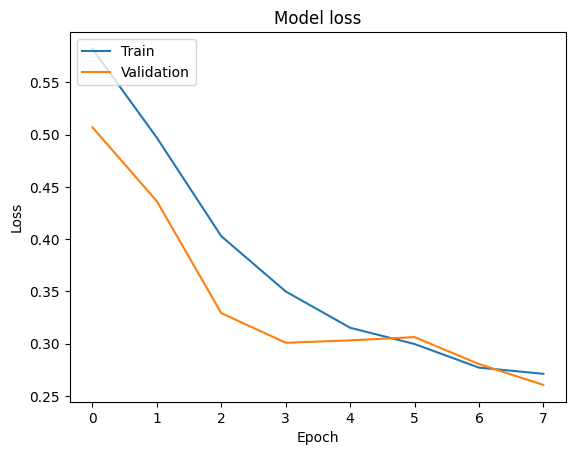

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

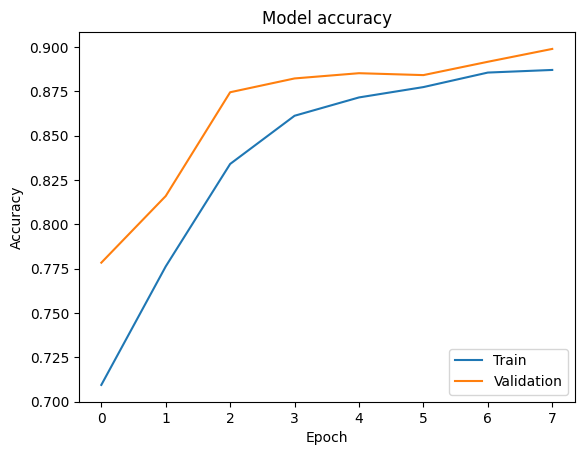

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [5]:
# Sad attempt at trying to put in an image to see if it works (ai image)

model = keras.models.load_model("C:/Users/lisat/OneDrive/Documents/GitHub/Project-2.2_Group-14/src/main/java/com/example/g14/NeuralNetworks/ART_CNN2_save_at_4.keras")
from keras.preprocessing.image import load_img
test_cat = load_img("C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/ai.jpg")
print(type(test_cat))
print(test_cat.format)
print(test_cat.mode)
print(test_cat.size)

test_cat = test_cat.resize((512, 512))

test_cat = np.array(test_cat).reshape(-1, 512, 512, 3)
test_cat = test_cat/255.0
print(test_cat)

print(model.predict(test_cat))




<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(2048, 1365)
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.00392157 0.00392157]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.00392157 0.00392157 0.00392157]
   [0.         0.         0.        ]
   [0.00784314 0.00784314 0.00784314]]

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00784314 0.00784314 0.00784314]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0

In [10]:
# Sad attempt at trying to put in an image to see if it works (non-ai image)
from keras.preprocessing.image import load_img
test_cat = load_img("C:/Users/lisat/OneDrive/Documents/Maastricht/2-6 Project 2.2/a8c923e1-078d-4f94-b1f4-0e303afe2155__640.JPG")
print(type(test_cat))
print(test_cat.format)
print(test_cat.mode)
print(test_cat.size)

test_cat = test_cat.resize((520, 520))

test_cat = np.array(test_cat).reshape(-1, 520, 520, 3)
test_cat = test_cat/255.0

print(model.predict(test_cat))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(436, 560)


ValueError: in user code:

    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(None, 520, 520, 3)


In [17]:
errors = []
j = 0
for images, labels in val_data:
    for i in range(images.shape[0]):
        if j > 10:
            break
        image = np.expand_dims(images[i], axis=0)  # Make the image batched
        prediction = model.predict(image)
        print(f"Predicted: {prediction}, Actual: {labels[i]}")

        errors.append(abs(prediction - labels[i]))
        j += 1

print(f"Mean error: {np.mean(errors)}")

1/1 [==============================] - 0s 52ms/step
Predicted: [[0.]], Actual: 0
1/1 [==============================] - 0s 45ms/step
Predicted: [[0.]], Actual: 0
1/1 [==============================] - 0s 44ms/step
Predicted: [[0.9999999]], Actual: 0
1/1 [==============================] - 0s 42ms/step
Predicted: [[0.]], Actual: 0
1/1 [==============================] - 0s 46ms/step
Predicted: [[0.]], Actual: 0
1/1 [==============================] - 0s 50ms/step
Predicted: [[2.1239932e-26]], Actual: 0
1/1 [==============================] - 0s 52ms/step
Predicted: [[1.]], Actual: 1
1/1 [==============================] - 0s 42ms/step
Predicted: [[0.]], Actual: 1
1/1 [==============================] - 0s 41ms/step
Predicted: [[0.]], Actual: 0
1/1 [==============================] - 0s 41ms/step
Predicted: [[8.284358e-36]], Actual: 0
1/1 [==============================] - 0s 47ms/step
Predicted: [[0.]], Actual: 0
Mean error: 0.09090909090909091


AttributeError: 'list' object has no attribute 'flatten'